In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [5]:
X = pd.read_csv("https://raw.githubusercontent.com/gilbutITbook/080263/master/chap3/data/credit%20card.csv")
X.drop('CUST_ID', axis=1, inplace=True)
X.ffill(inplace=True)
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components=2)
pca_x = pca.fit(X_normalized)
print(pca_x.explained_variance_ratio_, end='\n\n')

X_principal = pca.transform(X_normalized)
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])
print(X_principal.head())

[0.29038417 0.18386986]

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268879
3 -0.481656 -0.097611
4 -0.563512 -0.482506


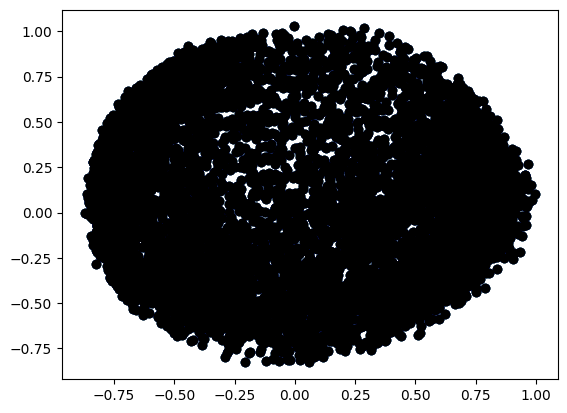

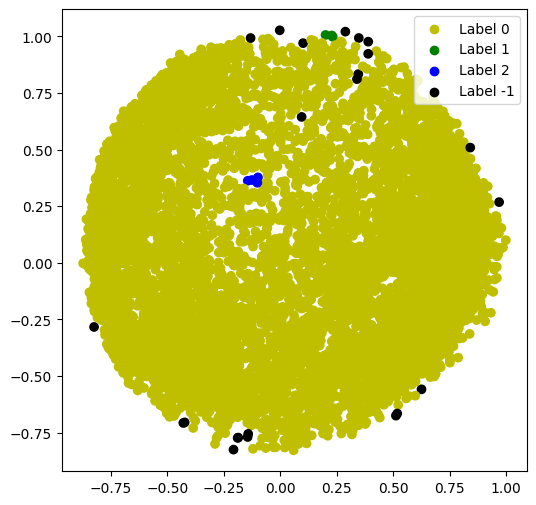

In [29]:
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal)
labels = db_default.labels_

colors = {}
colors[0] = 'y'
colors[1] = 'g'
colors[2] = 'b'
colors[-1] = 'k'

r = plt.scatter(X_principal['P1'], X_principal['P2'], color='y')
g = plt.scatter(X_principal['P1'], X_principal['P2'], color='g')
b = plt.scatter(X_principal['P1'], X_principal['P2'], color='b')
k = plt.scatter(X_principal['P1'], X_principal['P2'], color='k')

cvev = [colors[l] for l in labels]

plt.figure(figsize=(6,6))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvev)
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'), loc='upper right')
plt.show()